# Training a Simple CNN

In [1]:
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from data.image_dataset import ImageDataset
from training.cnn import ConvNet
from training.train import *
from training.eval import *
from data.convert_labels import *
import matplotlib.pyplot as plt

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Create ImageDataset
annotations_file_path = 'data/real/01_20_160_120/01_20_160_120.csv'
img_dir_path = 'data/real/01_20_160_120'

# Can override arguments specifying class boundaries
target_transform = lambda target: convert_labels(target)

train_data = ImageDataset(
  annotations_file=annotations_file_path,
  img_dir=img_dir_path,
  transform=None,
  target_transform=target_transform
)

In [3]:
# Create Dataloader
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(np.unique(train_labels))

Feature batch shape: torch.Size([64, 1, 120, 160])
Labels batch shape: torch.Size([64])
[ 0  1  2  3  5  6  7  8  9 10 11 13 14 15]


In [4]:
model = ConvNet(input_dims=(160, 120))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

results = train(model, criterion, optimizer, train_loader, epochs=10)

| epoch  1 | train acc 0.361951 |
| epoch  2 | train acc 0.869505 |
| epoch  3 | train acc 0.926511 |
| epoch  4 | train acc 0.978709 |
| epoch  5 | train acc 0.980769 |
| epoch  6 | train acc 0.993132 |
| epoch  7 | train acc 0.997940 |
| epoch  8 | train acc 0.997940 |
| epoch  9 | train acc 0.997940 |
| epoch 10 | train acc 0.998626 |


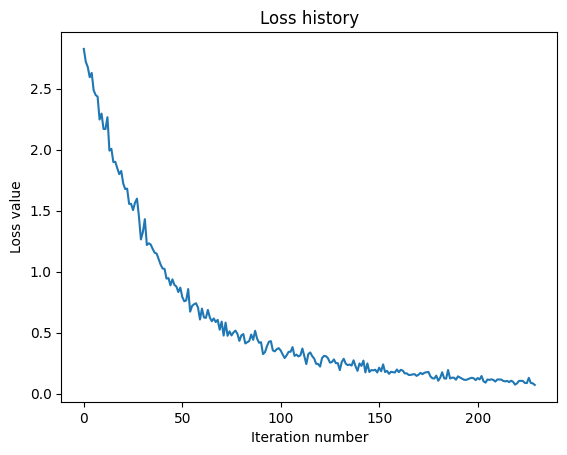

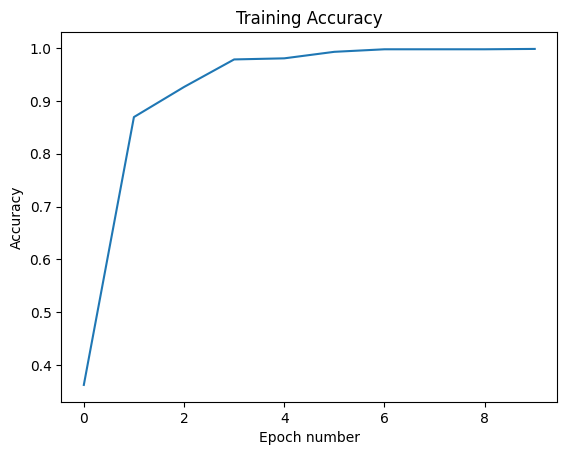

In [7]:
iter_train_loss_list, train_acc_list = results
plt.plot(iter_train_loss_list)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.title('Loss history')
plt.show()

plt.plot(train_acc_list)
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()